# Importing Libraries

In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [374]:
df = pd.read_csv("UberDataset.csv")

In [376]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [378]:
df.shape

(1156, 7)

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [382]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

# Data Preprocessing

In [385]:
df['PURPOSE'].fillna('NOT',inplace=True)

In [387]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [389]:
df["START_DATE"]= pd.to_datetime(df["START_DATE"],errors="coerce")
df["END_DATE"]= pd.to_datetime(df["END_DATE"],errors="coerce")

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [393]:
df["Date"]=pd.DatetimeIndex(df["START_DATE"]).date
df["Time"]=pd.DatetimeIndex(df["START_DATE"]).hour

In [395]:
df["Day-Night"] = pd.cut(x=df["Time"],bins=[0,10,15,19,24],labels=["Morning","Afternon","Evening","Night"])

In [397]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternon


In [399]:
df.dropna(inplace=True)

In [401]:
df.shape

(413, 10)

# Data Visulization

## In which category do people book the most Uber rides?

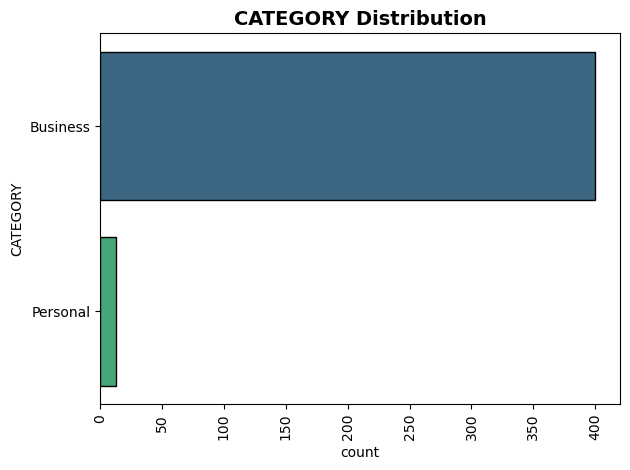

In [405]:
# Create the figure with a larger size
sns.countplot(df['CATEGORY'], palette='viridis', edgecolor='black')
plt.xticks(rotation=90)
plt.title("CATEGORY Distribution", fontsize=14, fontweight='bold')  # Title for the left subplot
# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap of titles and labels
plt.show()


## Conclusion : Business users predominantly prefer Uber over personal, indicating a stronger reliance on ride-sharing services for professional needs.

## For which purpose do people book Uber rides the most?

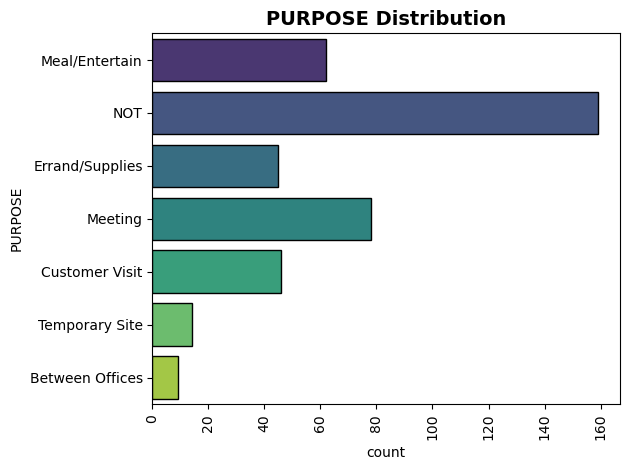

In [409]:
sns.countplot(df['PURPOSE'], palette='viridis', edgecolor='black')
plt.xticks(rotation=90)
plt.title("PURPOSE Distribution", fontsize=14, fontweight='bold')  # Title for the right subplot

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap of titles and labels
plt.show()


## Conclusion: Additionally, the data shows that Uber is more frequently used for meetings compared to other purposes, highlighting its importance in business-related travel.

## At what time do people book cabs the most from Uber?

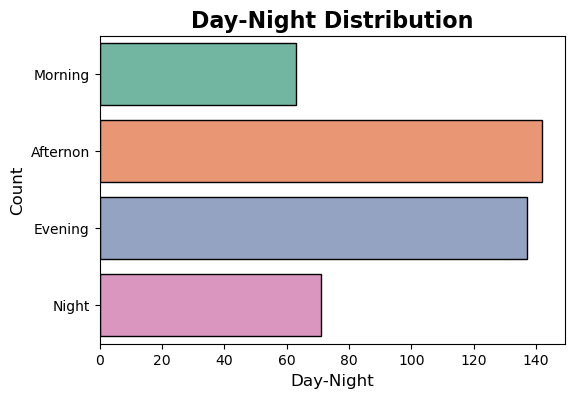

In [413]:
# Set the global color palette to "pastel"
sns.set_palette("muted")

# Create the countplot with improved aesthetics
plt.figure(figsize=(6, 4))  # Set figure size
ax = sns.countplot(y=df["Day-Night"], edgecolor="black",palette="Set2")  # Use the global pastel palette

# Add a title and axis labels
ax.set_title("Day-Night Distribution", fontsize=16, fontweight='bold')  # Title
ax.set_xlabel("Day-Night", fontsize=12)  # X-axis label
ax.set_ylabel("Count", fontsize=12)  # Y-axis label

# Show the plot
plt.show()

## Conclusion: Peope book cab mostly in Afternoon as seen from graph

In [417]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternon


In [421]:
df['Day']=df.START_DATE.dt.weekday

day_label = { 0.0: 'Monday', 
    1.0: 'Tuesday', 
    2.0: 'Wednesday', 
    3.0: 'Thursday', 
    4.0: 'Friday', 
    5.0: 'Saturday', 
    6.0: 'Sunday'}

df['Day']=df.Day.map(day_label)

In [423]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternon,Wednesday


## On which days of the week do people book Uber rides the most?

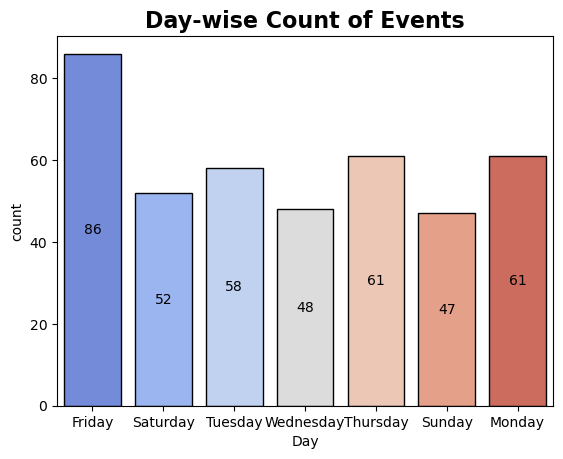

In [425]:
# Assuming day_label contains counts of the 'Day' column
day_label = df['Day'].value_counts(sort=False)

# Create the barplot
ax = sns.barplot(x=day_label.index, y=day_label, edgecolor='black', palette='coolwarm')

# Annotate each bar with its value
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.0f', label_type='center')  # '%.0f' formats the label as an integer

plt.title("Day-wise Count of Events", fontsize=16, fontweight='bold')
plt.show()

## Conclusion : The data clearly indicates that Friday is the most popular day for Uber rides, with a significant increase in bookings compared to other days of the week. This suggests that people tend to prefer Uber on Fridays, possibly due to weekend travel, social events, or end-of-week commutes.

## How many miles do people usually book a cab for through Uber?

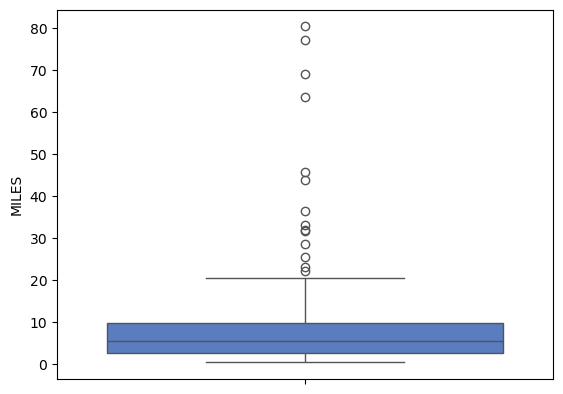

In [427]:
sns.boxplot(df[df['MILES']<100]['MILES'])
plt.show()

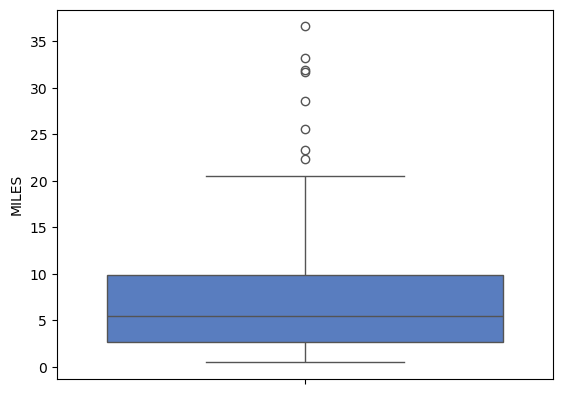

In [430]:
sns.boxplot(df[df['MILES']<40]['MILES'])
plt.show()

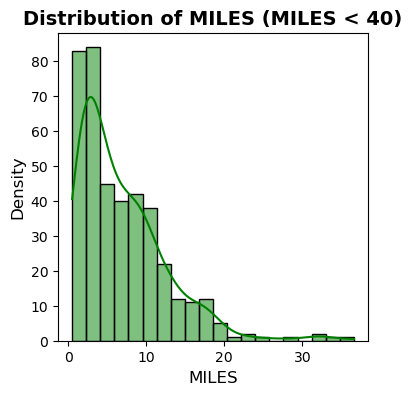

In [432]:
# Filter the data
filtered_data = df[df['MILES'] < 40]['MILES']

# Plot the histogram and KDE
plt.figure(figsize=(4,4))
sns.histplot(filtered_data, kde=True, bins=20, color='green', edgecolor='black')

# Add title and labels
plt.title("Distribution of MILES (MILES < 40)", fontsize=14, fontweight='bold')
plt.xlabel("MILES", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Show the plot
plt.show()

## Conclusion:The data reveals that most Uber bookings are for distances up to 20 miles, indicating that people primarily use the service for shorter trips. Although rides can extend up to 80 miles, such long-distance bookings are rare, suggesting that Uber is more commonly used for local travel.